In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


data_dir = 'data/garbage_images'

# Image preprocessing settings
img_height, img_width = 150, 150
batch_size = 32

# Image augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  # 6 garbage classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


C:\Users\LHCP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\LHCP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.2696 - loss: 2.4088 - val_accuracy: 0.4533 - val_loss: 1.3870
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 395ms/step - accuracy: 0.4713 - loss: 1.2972 - val_accuracy: 0.5368 - val_loss: 1.2442
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 389ms/step - accuracy: 0.5970 - loss: 1.0686 - val_accuracy: 0.5825 - val_loss: 1.1198
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 389ms/step - accuracy: 0.7133 - loss: 0.8074 - val_accuracy: 0.5944 - val_loss: 1.1983
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 407ms/step - accuracy: 0.7569 - loss: 0.6851 - val_accuracy: 0.5666 - val_loss: 1.3465


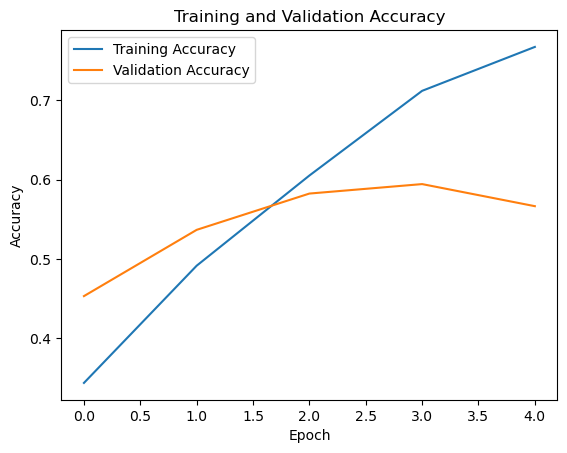

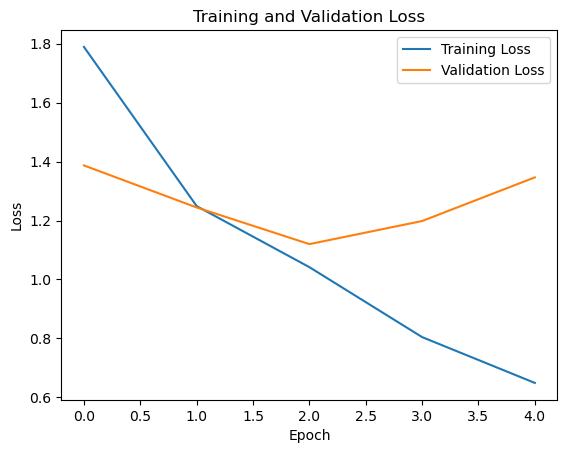

In [4]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
